# Алгоритмы классификации: деревья решений

*  На основе датасета titanic обучить дерево решений
*  Подобрать оптимальную глубину дерева так же, как мы делали на занятии
*  Определить самые важные фичи
*  Визуализировать полученное дерево

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
# В данном случае датасет разделен на два файла с test и train
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Удалим из train нашу целевую переменную Survived и запишем ее в y_train
y_train = train.Survived
train = train.drop(columns='Survived')
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Сверим колонки в test и train
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [10]:
# Добавим столбец train, чтобы можно было разделить потом наши данные

train['train'] = 1
test['train'] = 0

In [11]:
# Объединим данные в один датасет, так будет проще их обработать
data = pd.concat([train, test])
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
train          1309 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [13]:
# Поработаем со столбцом Name, вроде должен дать хороший результат
data[data['Name'].str.contains('Mr.|Mrs.|Miss.|Master.|Dr.|Col.|Rev.')==False]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,1
369,370,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,1
443,444,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,1
449,450,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,1
536,537,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,1
641,642,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,1
745,746,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,1
759,760,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,1
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,1
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,0


In [14]:
def name(row):
    list_ = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.', 'Col.', 'Rev.']
    for i in list_:
        if i in row['Name']:
            return i
    return 'Unknown'

In [15]:
data['name_re'] = data.apply(name, axis=1)
data['name_re'].value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
Unknown     14
Rev.         8
Dr.          8
Col.         4
Name: name_re, dtype: int64

In [16]:
# Удалим столбцы, которые нам не помогут в исследовании
data = data.drop(columns= ['Cabin', 'Ticket', 'PassengerId', 'Name', 'SibSp', 'Embarked', 'Sex'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
Pclass     1309 non-null int64
Age        1046 non-null float64
Parch      1309 non-null int64
Fare       1308 non-null float64
train      1309 non-null int64
name_re    1309 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 71.6+ KB


In [18]:
# Поработаем с пустыми значениями в Age и Fare
data['Age'] = data['Age'].fillna(data.Age.mean())

In [19]:
data['Fare'].fillna(0, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 6 columns):
Pclass     1309 non-null int64
Age        1309 non-null float64
Parch      1309 non-null int64
Fare       1309 non-null float64
train      1309 non-null int64
name_re    1309 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 71.6+ KB


In [21]:
data.head()

,Pclass,Age,Parch,Fare,train,name_re
0,3,22.0,0,7.2500,1,Mr.
1,1,38.0,0,71.2833,1,Mrs.
2,3,26.0,0,7.9250,1,Miss.
3,1,35.0,0,53.1000,1,Mrs.
4,3,35.0,0,8.0500,1,Mr.


In [22]:
# Уйдем от категориальной переменной в столбце Sex
#data.Sex = data.Sex.replace(to_replace=['male', 'female'], value=[1, 0])

In [23]:
data.head()

,Pclass,Age,Parch,Fare,train,name_re
0,3,22.0,0,7.2500,1,Mr.
1,1,38.0,0,71.2833,1,Mrs.
2,3,26.0,0,7.9250,1,Miss.
3,1,35.0,0,53.1000,1,Mrs.
4,3,35.0,0,8.0500,1,Mr.


In [24]:
# get_dummies для столбцов name_re и Pclass
data_dummies = pd.get_dummies(data, columns=['Pclass', 'name_re'])

In [25]:
data_dummies.head()

,Age,Parch,Fare,train,Pclass_1,Pclass_2,Pclass_3,name_re_Col.,name_re_Dr.,name_re_Master.,name_re_Miss.,name_re_Mr.,name_re_Mrs.,name_re_Rev.,name_re_Unknown
0,22.0,0,7.2500,1,0,0,1,0,0,0,0,1,0,0,0
1,38.0,0,71.2833,1,1,0,0,0,0,0,0,0,1,0,0
2,26.0,0,7.9250,1,0,0,1,0,0,0,1,0,0,0,0
3,35.0,0,53.1000,1,1,0,0,0,0,0,0,0,1,0,0
4,35.0,0,8.0500,1,0,0,1,0,0,0,0,1,0,0,0


In [26]:
# Разделим наши данные на train и test по столбцу train
X_train = data_dummies[data_dummies.train==1].drop('train', axis=1)
X_test = data_dummies[data_dummies.train==0].drop('train', axis=1)

In [27]:
# Дальше нормируем наши значения, используя StandardScaler
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
X_train_scaled = scaler.transform(X_train)

In [31]:
X_test_scaled = scaler.transform(X_test)

In [32]:
# Разделим данные на обучающую и тестовую

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_scaled, y_train, test_size=0.2)

In [35]:
# Найдем оптимальную глубину дерева, используя GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
depths = np.arange(1,10)
param_grid = {'max_depth': depths}
param_grid

{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [38]:
clf_2 = DecisionTreeClassifier()

In [39]:
grid_tree = GridSearchCV(clf_2, param_grid, scoring='accuracy', cv = 10) 

In [40]:
grid_tree.fit(X_train2, y_train2)

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [41]:
print('Наилучшие значения параметров: {}'.format(grid_tree.best_params_))
print('Наилучшее значение кросс-валид. правильности: {:.3f}'.format(grid_tree.best_score_))
print('Наилучшая модель: {}'.format(grid_tree.best_estimator_))

Наилучшие значения параметров: {'max_depth': 6}
Наилучшее значение кросс-валид. правильности: 0.834
Наилучшая модель: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [42]:
# Применим DecisionTreeClassifier с максимальной глубиной 6
clf = DecisionTreeClassifier(max_depth=6)

In [43]:
clf.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
y_test_pred2 = clf.predict(X_test2)

In [45]:
clf.score(X_train2, y_train2)

0.8918539325842697

In [46]:
clf.score(X_test2, y_test2)

0.8156424581005587

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred2, y_test2))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       114
           1       0.73      0.78      0.76        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



In [48]:
clf.feature_importances_

array([0.06952621, 0.01408179, 0.25633167, 0.00504433, 0.        ,
       0.11809367, 0.00818451, 0.01272036, 0.        , 0.        ,
       0.48545437, 0.        , 0.03056307, 0.        ])

In [49]:
# Построим дерево
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

/home/lena/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


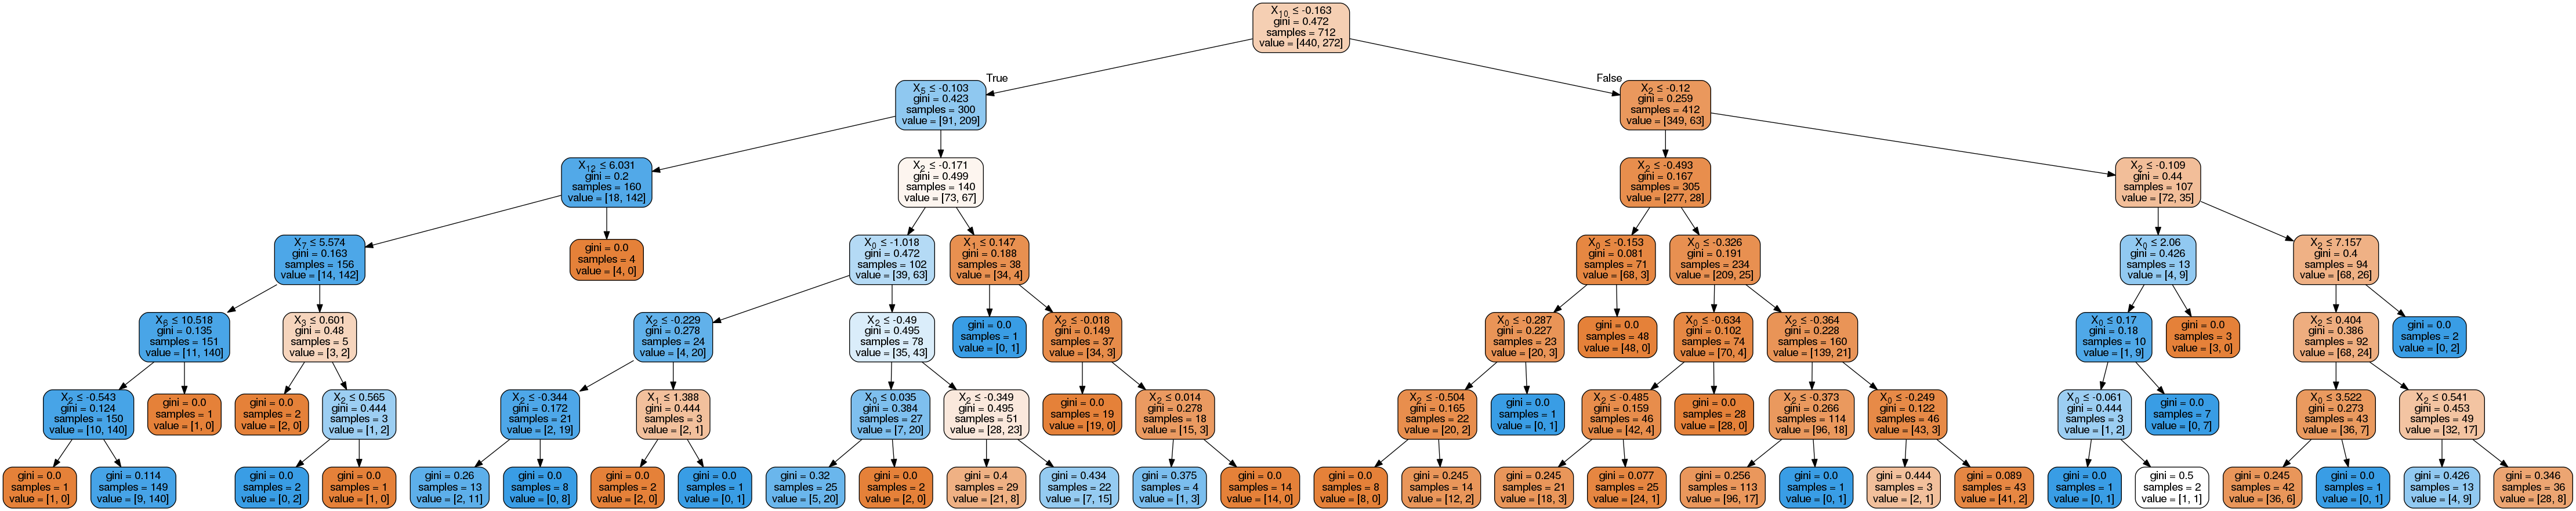

In [50]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [51]:
# Найдем самые важные фичи
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

([<matplotlib.axis.YTick at 0x7f3e0ad0d9b0>,
 <a list of 14 Text yticklabel objects>)

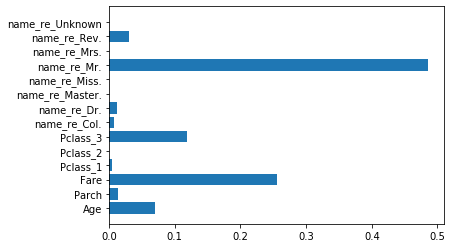

In [52]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)

In [53]:
for col, val in zip(X_train.columns, clf.feature_importances_):
    print("{:15} {:.2f}".format(col, val))

Age             0.07
Parch           0.01
Fare            0.26
Pclass_1        0.01
Pclass_2        0.00
Pclass_3        0.12
name_re_Col.    0.01
name_re_Dr.     0.01
name_re_Master. 0.00
name_re_Miss.   0.00
name_re_Mr.     0.49
name_re_Mrs.    0.00
name_re_Rev.    0.03
name_re_Unknown 0.00


In [54]:
# Как видно, самой важной фичой оказалось наличие в имени Mr. (По факту скорее всего наличие в имени Mr. 
# указывает на пол, то есть если бы мы не заморачивались с именами, а использовали поле Sex, 
# то точность была бы скорее всего такой же)